## Import Libraries and Dataset

In [ ]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import nltk
import warnings
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# from IPython import as plt
# warnings.filterwarnings('ignore')
# display.set_matplotlib_formats('svg')

import spacy # fast NLP
import pandas as pd # dataframes
# import langid # language identification (i.e. what language is this?)
from nltk.classify.textcat import TextCat # language identification from NLTK
from matplotlib.pyplot import plot

import re
import json
import nltk
import spacy
import string
import unicodedata
from bs4 import BeautifulSoup
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, FreqDist
%config InlineBackend.figure_format = 'retina' # high resolution plotting
import matplotlib.pyplot as plt
import pandas as pd
# import advertools as adv
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 280)
# adv.__version__
from sklearn.model_selection import train_test_split

folder_path = '/content/drive/MyDrive/Projects/Akaike/NLP_Sentimental/'
import json
with open(folder_path+'tweets.json') as jfile:
  d = json.load(jfile)

### Rough view of tweets

<pre>
 '1339578709846732800': {'tweet_author': 'pharmanewsintel',
  'tweet_text': "AstraZeneca's Phase 2 #clinicaltrial found that multiple cell lymphoma patients treated with AstraZeneca’s #cancerdrug, Calquence, remained progression free for an average of 22 months. \n\nhttps://t.co/C5Xxpxjt8n"},
 '1339432645084684289': {'tweet_author': 'JPubb 日本企業 リリース 医薬品',
  'tweet_text': 'アストラゼネカのアカラブルチニブ（Calquence®）、4つの試験データによって、慢性リンパ性白血病の患者さんの心血管安全性プロ... 〔12/17 アストラゼネカ〕 https://t.co/isvqYLMTWE'},
 '1339400282984214528': {'tweet_author': 'PR TIMESビジネス',
  'tweet_text': 'アストラゼネカのアカラブルチニブ（Calquence®）、4つの試験データによって、慢性リンパ性白血病の患者さんの心血... https://t.co/UAxtcYBcaN'},
 '1339392438775894018': {'tweet_author': 'PR TIMESニュース',
  'tweet_text': 'アストラゼネカのアカラブルチニブ（Calquence®）、4つの試験データによって、慢性リンパ性白血病の患者さんの心血... https://t.co/1BZ6NYUWon'},
 '1339390406853881857': {'tweet_author': 'WMR Tokyo - スタートアップ',
  'tweet_text': 'アストラゼネカのアカラブルチニブ（Calquence(R)）、4つの試験データによって、慢性リンパ性白血病の患者さんの心血管安全性プロファイルを評価 https://t.co/rwagDQt79P'},
 '1339337448543883267': {'tweet_author': 'Ashleigh Walls',
  'tweet_text': 'Consider CALQUENCE for any adult you may know living with chronic lymphocytic leukemia (CLL) or small lymphocytic lymphoma (SLL). It’s a prescription oral 2x a day capsule. Learn more: https://t.co/BuFOYoX5iY #bloodcancerawareness #ad https://t.co/TjcmlppbWN https://t.co/XSJy81zZGo'},
 '1339280070196621312': {'tweet_author': 'bargainbriana',
  'tweet_text': 'Taking CLL medication should be as convenient as an oral, twice a day capsule. If you or someone you love has CLL, you may have options with prescription CALQUENCE for adult patients with CLL. https://t.co/olbLAT1iul #bloodcancerawareness #ad https://t.co/IN8KmIDSIN https://t.co/21brOD585J'},
 '1339275381170348032': {'tweet_author': 'April Golightly',
  'tweet_text': 'Consider CALQUENCE for any adult you may know living with chronic lymphocytic leukemia (CLL) or small lymphocytic lymphoma (SLL). It’s a prescription oral 2x a day capsule. Learn more: https://t.co/uzjsIfXTb9 #bloodcancerawareness #ad https://t.co/613omF99rh https://t.co/M6FMVHOT2h'},
 '1339165345291112449': {'tweet_author': 'dough',
  'tweet_text': '$AZN LR OP Multiple best-in-class oncology portfolio deserves premium Oncology portfolio includes multiple potentially best-in-class assets, including Tagrisso, Lynparza, Calquence, Enhertu, and Imfinzi https://t.co/KFiGbg5jvi'},
 '1339017286653448192': {'tweet_author': 'jorge',
  'tweet_text': 'Cancer drug as COVID-19 treatment scrapped from WHO Solidarity Trials https://t.co/isO9vJe4js'},
 '1338970852617019393': {'tweet_author': 'iSanidad',
  'tweet_text': '#Investigación 🔎 | Los datos de #acalabrutinib de 4 ensayos clínicos refuerzan su perfil de seguridad cardiovascular en pacientes con #leucemia linfocítica crónica @AstraZenecaES \n\nhttps://t.co/c60KOMIBJt'},
 '1338857609542201344': {'tweet_author': 'iSanidad',
  'tweet_text': '🔎 Los datos de #acalabrutinib de 4 ensayos clínicos refuerzan su perfil de seguridad cardiovascular en pacientes con #leucemia linfocítica crónica @AstraZenecaES \n\nhttps://t.co/c60KOMIBJt'},
 '1338710401790472194': {'tweet_author': 'OncLive.com',
  'tweet_text': 'Patients with CLL who received treatment with single-agent acalabrutinib experienced a low incidence of cardiac toxicities leading to treatment discontinuation. @ASH_hematology #ASH20 https://t.co/1bPqyNA0km'},
 '1338662943920152578': {'tweet_author': 'Trip Database',
  'tweet_text': 'New2Trip: Acalabrutinib (Calquence) - chronic lymphocytic leukaemia (CLL) https://t.co/u3lRYIvDfK'},
 '1338620216897544192': {'tweet_author': 'Radyo La Verdad 1350',
  'tweet_text': 'Kinumpirma ng Department of Health na hindi na gagamitin sa World Health Organization solidarity trial ng therapeutics o mga gamot ang Acalabrutinib. https://t.co/FwV4nC5tzT'},
 '1336828570585468930': {'tweet_author': 'Christi B',
  'tweet_text': 'With @CALQUENCE, feel supported all day and night with patient and caregiver resources. CALQUENCE is an oral, 2x a day prescription medication to treat adult patients with CLL or SLL. Learn more at [https://t.co/Ay3QXBPHkk]. #bloodcancerawareness #ad https://t.co/o9G2s6XEMh https://t.co/1AiGr7uzIf'}
  </pre>

* We understand that the data contains tweets in different language.
* Thus percentage of other language must be explored.

In [ ]:
df= pd.DataFrame.from_dict(d)
df = df.T
df.head()

tweet_author  \
1374140386071961602  Hematopoiesis News   
1374032432173842437    Michael Wang, MD   
1373902876553048065         1stOncology   
1373656782367813635           Toby Eyre   
1372941634334232586        Lymphoma Hub   

                                                                                                                                                                                                                                                              tweet_text  
1374140386071961602                      ⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%. \nhttps://t.co/eJ6m4QpC5P https://t.co/kuZz6ZO47r  
1374032432173842437  This phase 2 Acalabrutinib-Venetoclax (AV) trial that is still in recruitment phase will study how well venetoclax and acalabrutinib works in MCL patients who either relapsed or non-respondent to the initial therapy.\n\nhttps://t.co/gg0G9At23N  
1373902876553048065                                                                                                                                                                                #NICE backs #AstraZenecas #Calquence for #CLL https://t.co/Vb5lPDoGrA  
1373656782367813635                                                                    #acalabrutinib is a valuable option in pts intolerant to #ibrutinib. Further valuable data to help decision making in #CLL \n\nEarly View | Haematologica https://t.co/Z2kCLZaX0D  
1372941634334232586                                                                            NICE has recommended the use of acalabrutinib for patients with treatment-naïve chronic lymphocytic leukemia. Find out more here https://t.co/6OuJptLCIN #lymsm #lymphoma

In [ ]:
df.shape

(43347, 2)

## Data Preprocessing

In [ ]:
!pip install langid
# !pip install advertools
!pip install contractions

In [ ]:
import contractions
import langid
# import advertools

### Examine the Language


In [ ]:
# examine the percentage of other language
import langid
# get language id for each text
ids_langid = df['tweet_text'].apply(langid.classify)
print(ids_langid[0])
# get just the language label
langs = ids_langid.apply(lambda tuple: tuple[0])
# unique languages present
print(f"no of unique languages estimated: {len(langs.unique())}")
print('unique languages:')
print(langs.unique())
print(f"percentage of English: {(sum(langs=='en')/len(langs))*100}")

('en', -357.09133434295654)
no of unique languages estimated: 76
unique languages:
['en' 'an' 'es' 'de' 'fr' 'it' 'ja' 'mt' 'tl' 'zh' 'la' 'tr' 'nl' 'ru'
 'pt' 'fi' 'sl' 'hi' 'lb' 'cs' 'pl' 'sv' 'jv' 'ar' 'qu' 'sr' 'ca' 'gl'
 'bn' 'hu' 'rw' 'el' 'no' 'hr' 'id' 'eu' 'fa' 'da' 'km' 'he' 'ro' 'lt'
 'et' 'sq' 'ku' 'cy' 'am' 'br' 'ko' 'xh' 'wa' 'lo' 'zu' 'az' 'sw' 'af'
 'eo' 'ps' 'oc' 'se' 'sk' 'ms' 'si' 'ur' 'lv' 'nn' 'nb' 'ht' 'is' 'th'
 'vi' 'ga' 'mg' 'ka' 'mr' 'hy']
percentage of English: 90.69370429326136


* Thus as 91% of the data is in English we will ignore other language tweets.

In [ ]:
# Assign the language to dataframe
df['language'] = langs
# query for only english tweets
df_e = df[df['language'] == 'en']
df_e.shape

(39313, 3)

In [ ]:
df_e.head()

tweet_author  \
1374140386071961602  Hematopoiesis News   
1374032432173842437    Michael Wang, MD   
1373902876553048065         1stOncology   
1373656782367813635           Toby Eyre   
1372941634334232586        Lymphoma Hub   

                                                                                                                                                                                                                                                              tweet_text  \
1374140386071961602                      ⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%. \nhttps://t.co/eJ6m4QpC5P https://t.co/kuZz6ZO47r   
1374032432173842437  This phase 2 Acalabrutinib-Venetoclax (AV) trial that is still in recruitment phase will study how well venetoclax and acalabrutinib works in MCL patients who either relapsed or non-respondent to the initial therapy.\n\nhttps://t.co/gg0G9At23N   
1373902876553048065                                                                                                                                                                                #NICE backs #AstraZenecas #Calquence for #CLL https://t.co/Vb5lPDoGrA   
1373656782367813635                                                                    #acalabrutinib is a valuable option in pts intolerant to #ibrutinib. Further valuable data to help decision making in #CLL \n\nEarly View | Haematologica https://t.co/Z2kCLZaX0D   
1372941634334232586                                                                            NICE has recommended the use of acalabrutinib for patients with treatment-naïve chronic lymphocytic leukemia. Find out more here https://t.co/6OuJptLCIN #lymsm #lymphoma   

                    language  
1374140386071961602       en  
1374032432173842437       en  
1373902876553048065       en  
1373656782367813635       en  
1372941634334232586       en

### Remove duplicates

In [ ]:
# removing duplicate tweets
df_e = df_e.drop_duplicates()
df_e.shape

(38007, 3)

### Visualize the Data

In [ ]:
def tweet_visualizing(data, m,n):
  for i in range((n-m)+1):
    print('-',m+1,'------------------------------------------------------------------------------------------')
    print(data[m])
    m = m+1

tweet_visualizing(df_e['tweet_text'], 0, 10)

- 1 ------------------------------------------------------------------------------------------
⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%. 
https://t.co/eJ6m4QpC5P https://t.co/kuZz6ZO47r
- 2 ------------------------------------------------------------------------------------------
This phase 2 Acalabrutinib-Venetoclax (AV) trial that is still in recruitment phase will study how well venetoclax and acalabrutinib works in MCL patients who either relapsed or non-respondent to the initial therapy.

https://t.co/gg0G9At23N
- 3 ------------------------------------------------------------------------------------------
#NICE backs #AstraZenecas #Calquence for #CLL https://t.co/Vb5lPDoGrA
- 4 ------------------------------------------------------------------------------------------
#acalabrutinib is a valuable option in pts intolerant to #ibrutinib. Further valuable

In [ ]:
tweet_visualizing(df_e['tweet_text'], 500, 510)

- 501 ------------------------------------------------------------------------------------------
$AZN (-1.2%) reports CALAVI Phase II trials for Calquence in patients hospitalised with respiratory symptoms of #COVID19 did not meet primary endpoint
- 502 ------------------------------------------------------------------------------------------
#AstraZeneca's cancer drug #Calquence fails to meet main goal in #COVID-19 trials https://t.co/nd06LWEqk9
- 503 ------------------------------------------------------------------------------------------
Update on CALAVI Phase II trials for Calquence in patients hospitalised with respiratory symptoms of COVID-19 https://t.co/aIDqP5ynUp
- 504 ------------------------------------------------------------------------------------------
AstraZenca’s Calquence (acalabrutinib) Fails to Meet its Primary Endpoint in P-II Studies for COVID-19 @Pharmashot @AstraZeneca 
https://t.co/6KhXxjiNHT https://t.co/eqIiafhMiw
- 505 --------------------------------------

* After visualizing few range of tweets, we observe that same tweets has slightly different url resulting in multiple tweets.

<pre>
* We observe that:
* tweets are repeated,tweets contain emojis,links, hastags, organizations and hastags
* Thus data need to be preprocessed with careful insights.

</pre>

Apart from normal preprocessing steps:
<pre>
* This dataset contains unique url address which is processed.    
* Custom stop word is applied inorder to preserve certain stopwords like 'not'
* Hastags are preserved in seperate column.
* Contractions are expanded.
* organization named NICE is changed to NIXX inorder to not to effect sentiment analysis if done further.    </pre>

In [ ]:
# removing custom stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
# new stopword list
# new_stopwords = ['is', 'and', 'the']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# import warnings
# warnings.filterwarnings("ignore")

In [ ]:
import textsearch
def remove_non_ascii(text):
  return re.sub(r'[^\x00-\x7f]',r' ', text)



def remove_special_characters(text):
    """
        Remove special special characters, including symbols, emojis, and other graphic characters
    """
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_single_char_func(text, threshold=2):
  threshold = threshold
  words = word_tokenize(text)
  texts = ' '.join([word for word in words if len(word)>threshold])
  return texts

def remove_punct(text):
    """
        Remove the punctuation
    """
    return text.translate(str.maketrans('', '', string.punctuation))

# def remove_custom_stopwords(s):
custom_stops = ['a','able','about','across','after','all','almost','also','am','among','an','and','any',
                  'are','as','at','be','because','been','but','by','could','dear','did','do',
                  'does','either','else','ever','every','for','from','get','got','had','has','have','he','her',
                  'hers','him','his','how','however','i','if','in','into','is','it','its','just','let','like',
                  'likely','may','me','might','most','must','my','neither','no','nor','of','often','on',
                  'only','or','other','our','own','rather','said','say','says','she','should','since','so','some',
                  'than','that','the','their','them','then','there','these','they','this','tis','to','too','twas',
                  'us','wants','was','we','were','what','when','where','which','while','who','whom','why','will',
                  'with','would','yet','you','your']
  # for c in custom_stops:
  #   s=s.replace(c,'')
  # return s

def remove_URL(text):
    """
        Remove URLs from a sample string
    """
    return re.sub(r"https://t.co/([A-Za-z0-9_]+)", '', text)

# function to call
def basic_preprocessing_tweets():

  df_e['tweet_text'] = df_e['tweet_text'].apply(lambda x: re.sub('NICE', 'NXXX',str(x)))
    # lowercase
  df_e['tweet_text'] = df['tweet_text'].str.lower()
  # remove @ mentions
  df_e['tweet_text'] = df_e['tweet_text'].apply(lambda x: re.sub("@[A-Za-z0-9_]+",'', str(x)))
  # remove special urls and tags
  df_e['tweet_text'] = df_e['tweet_text'].apply(lambda x:remove_URL(str(x)))
  # remove url and tags
  df_e['tweet_text'] = df_e['tweet_text'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))
  # preserve hastags
  df_e['hashtag'] = df_e['tweet_text'].apply(lambda x:re.findall(r'#(\w+)',str(x)))
  # remove hash but keep tags
  df_e['tweet_text'] = df_e['tweet_text'].apply(lambda x: re.sub("[^A-Za-z0-9_]+"," ", x))
  #remove multiple spaces
  df_e['tweet_text'] = df_e['tweet_text'].apply(lambda x: " ".join(x.split()))
  # expand contractions
  df_e['tweet_text'] = df_e['tweet_text'].apply(lambda x:contractions.fix(str(x)))
  # remove non ascii characters
  df_e['tweet_text'] = df_e['tweet_text'].apply(lambda x:remove_non_ascii(x))
  # removing numbers
  df_e['tweet_text'] = df_e['tweet_text'].apply(lambda x: "".join([i for i in x if not i.isdigit()]))
  # remove punctuation
  df_e["tweet_text"] = df_e["tweet_text"].apply(lambda x: remove_punct(x))
  # # remove single character
  df_e['tweet_text'] = df_e['tweet_text'].apply(lambda x: remove_single_char_func(x))
  # # remove selected stopwords
  df_e['tweet_text'] = df_e['tweet_text'].apply(lambda x: " ".join([i for i in x.split() if i not in custom_stops]))
  # # # #remove multiple spaces
  df_e['tweet_text'] = df_e['tweet_text'].apply(lambda x: " ".join(x.split()))


In [ ]:
basic_preprocessing_tweets()

In [ ]:
df_e.head()

tweet_author  \
1374140386071961602  Hematopoiesis News   
1374032432173842437    Michael Wang, MD   
1373902876553048065         1stOncology   
1373656782367813635           Toby Eyre   
1372941634334232586        Lymphoma Hub   

                                                                                                                                                                      tweet_text  \
1374140386071961602                             scientists conducted phase study acalabrutinib patients relapsed refractory cll ibrutinib intolerant found overall response rate   
1374032432173842437  phase acalabrutinib venetoclax trial still recruitment phase study well venetoclax acalabrutinib works mcl patients relapsed non respondent initial therapy   
1373902876553048065                                                                                                                        nice backs astrazenecas calquence cll   
1373656782367813635                               acalabrutinib valuable option pts intolerant ibrutinib further valuable data help decision making cll early view haematologica   
1372941634334232586                                         nice recommended use acalabrutinib patients treatment chronic lymphocytic leukemia find out more here lymsm lymphoma   

                    language                               hashtag  
1374140386071961602       en                                 [cll]  
1374032432173842437       en                                    []  
1373902876553048065       en  [nice, astrazenecas, calquence, cll]  
1373656782367813635       en       [acalabrutinib, ibrutinib, cll]  
1372941634334232586       en                     [lymsm, lymphoma]

In [ ]:
df_e.to_csv(folder_path+ 'med_preprocessed_tweets.csv')

In [ ]:
xx = pd.read_csv(folder_path+ 'med_preprocessed_tweets.csv')
xx.head()

## Exploratory Data Analysis

### Word Frequency

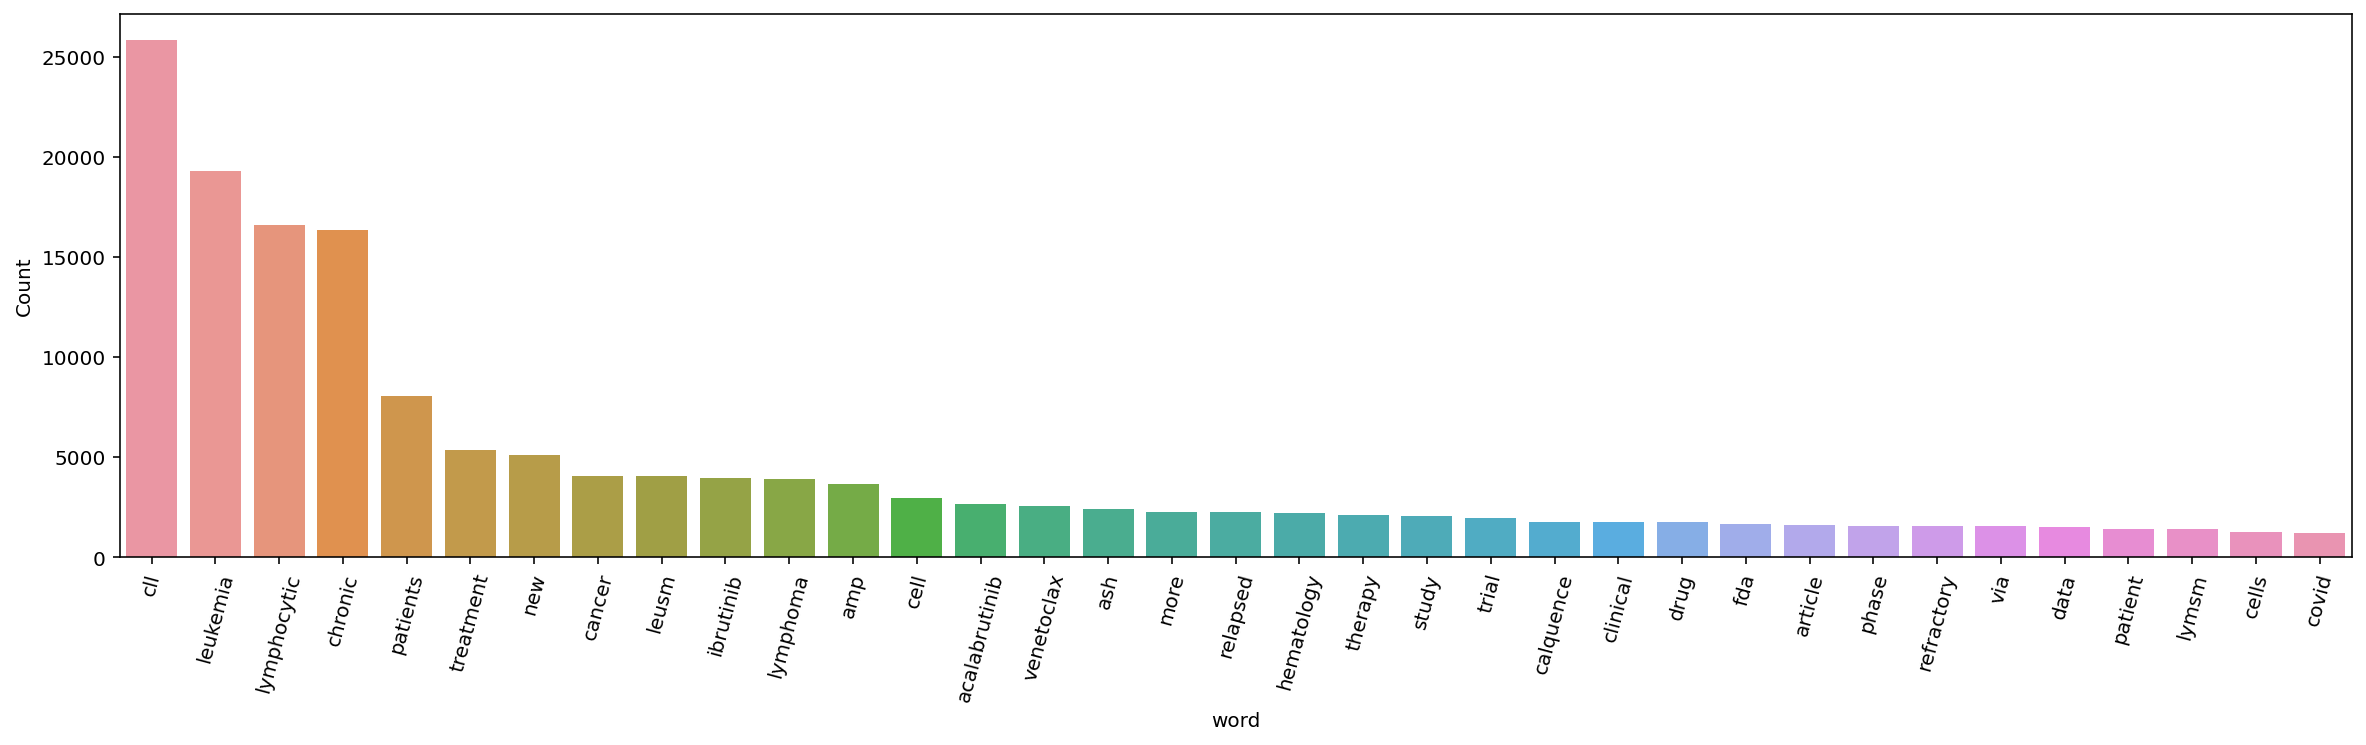

In [ ]:
from nltk.probability import FreqDist

def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.xticks(rotation=75)
  plt.show()

freq_words(df_e['tweet_text'], 35)


### Plotting Word Cloud

In [ ]:
tweets = [r for r in df_e['tweet_text']]
tokenized_tweets = pd.Series(tweets).apply(lambda x:str(x).split())
print(tokenized_tweets[0])

nlp = spacy.load('en_core_web_sm')

def lemmatization(texts, tags=['NOUN', 'ADJ']):
  output = []
  for sent in texts:
    doc = nlp(" ".join(sent))
    output.append([token.lemma_ for token in doc if token.pos_ in tags])
  return output

# lemmatize tweets
lemma_tweets = lemmatization(tokenized_tweets)
print(lemma_tweets[0])

tweets_3 = []
for i in range(len(lemma_tweets)):
  tweets_3.append(' '.join(lemma_tweets[i]))

df_e['tweet_text'] = tweets_3

['scientist', 'phase', 'study', 'patient', 'overall', 'response', 'rate']
['study', 'patient', 'overall', 'response', 'rate']


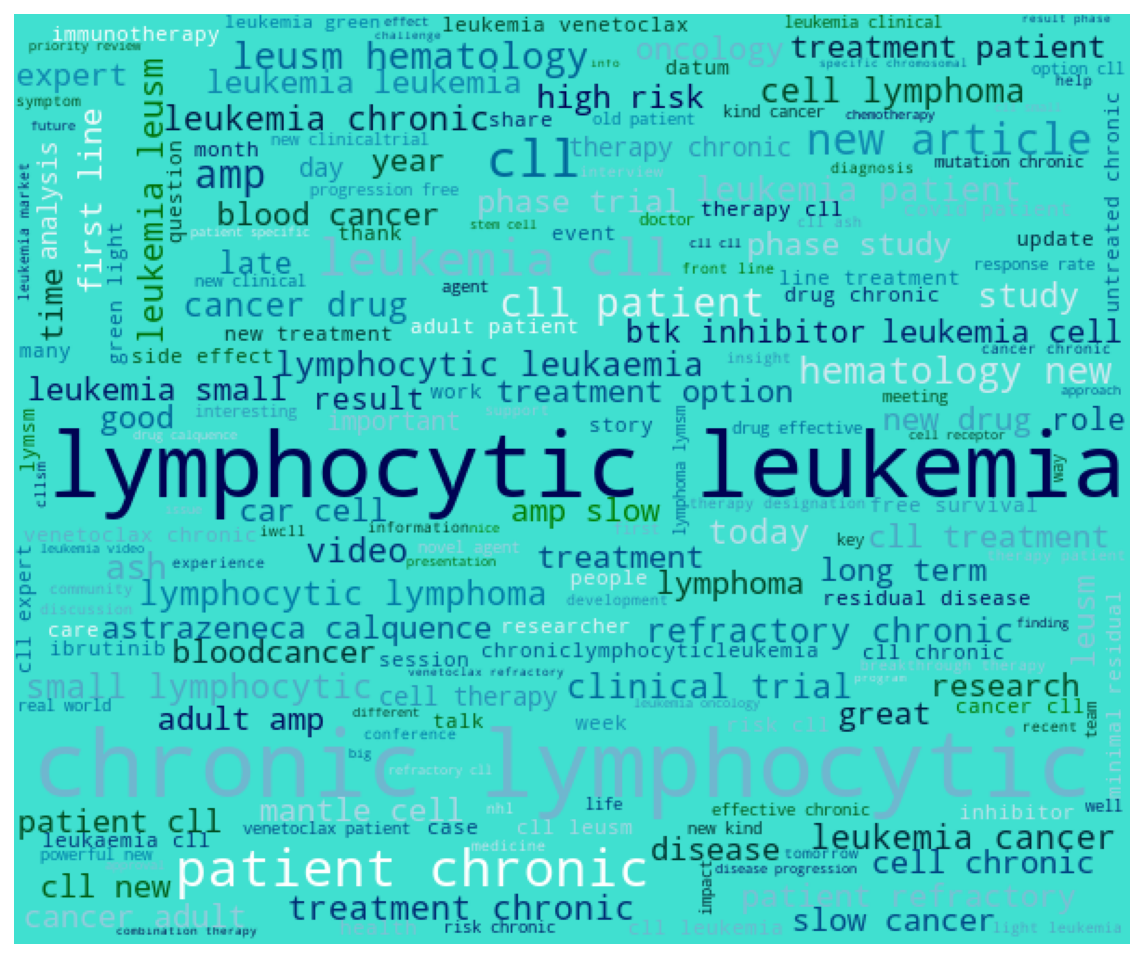

In [ ]:
words = ' '.join(text for text in df_e['tweet_text'])
#ploting the word cloud
import wordcloud
from wordcloud import WordCloud
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width = 600, height = 500, background_color='#40E0D0', colormap="ocean",  random_state=10).generate(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Visualizing N-grams

In [ ]:
# after basic preprocessing, visualize
# find n-grams
from nltk.util import ngrams
from collections import Counter

def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = str(document).split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df_a = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()

    df_a = df_a.rename(columns={'index':'words', 0:'count'})
    df_a = df_a.sort_values('count', ascending=False)
    df_a = df_a.head(30)
    df_a = df_a.sort_values('count')
    return(df_a)

# unigrams = documentNgrams(df_e['tweet_text'], 1)
# bigrams = documentNgrams(df_e['tweet_text'], 2)
# trigrams = documentNgrams(df_e['tweet_text'], 3)
# fr_grams = documentNgrams(df_e['tweet_text'], 4)


In [ ]:
fv_grams = documentNgrams(df_e['tweet_text'], 5)
sx_grams = documentNgrams(df_e['tweet_text'], 6)

In [ ]:
fv_grams.to_csv(folder_path+'entities/entity_fv_grams.csv', index=False)
sx_grams.to_csv(folder_path+'entities/entity_sx_grams.csv', index=False)

In [ ]:
unigrams.to_csv(folder_path + 'entities/entity_unigrams.csv', index=False)
bigrams.to_csv(folder_path + 'entities/entity_bigrams.csv', index=False)
trigrams.to_csv(folder_path + 'entities/entity_trigrams.csv', index=False)
fr_grams.to_csv(folder_path + 'entities/entity_fr_grams.csv', index=False)

In [ ]:
import matplotlib

In [ ]:
unigrams = pd.read_csv(folder_path + 'entities/entity_unigrams.csv').sort_values(by='count', ascending=False)
bigrams = pd.read_csv(folder_path + 'entities/entity_bigrams.csv').sort_values(by='count', ascending=False)
trigrams = pd.read_csv(folder_path + 'entities/entity_trigrams.csv').sort_values(by='count', ascending=False)
fr_grams = pd.read_csv(folder_path + 'entities/entity_fr_grams.csv').sort_values(by='count', ascending=False)

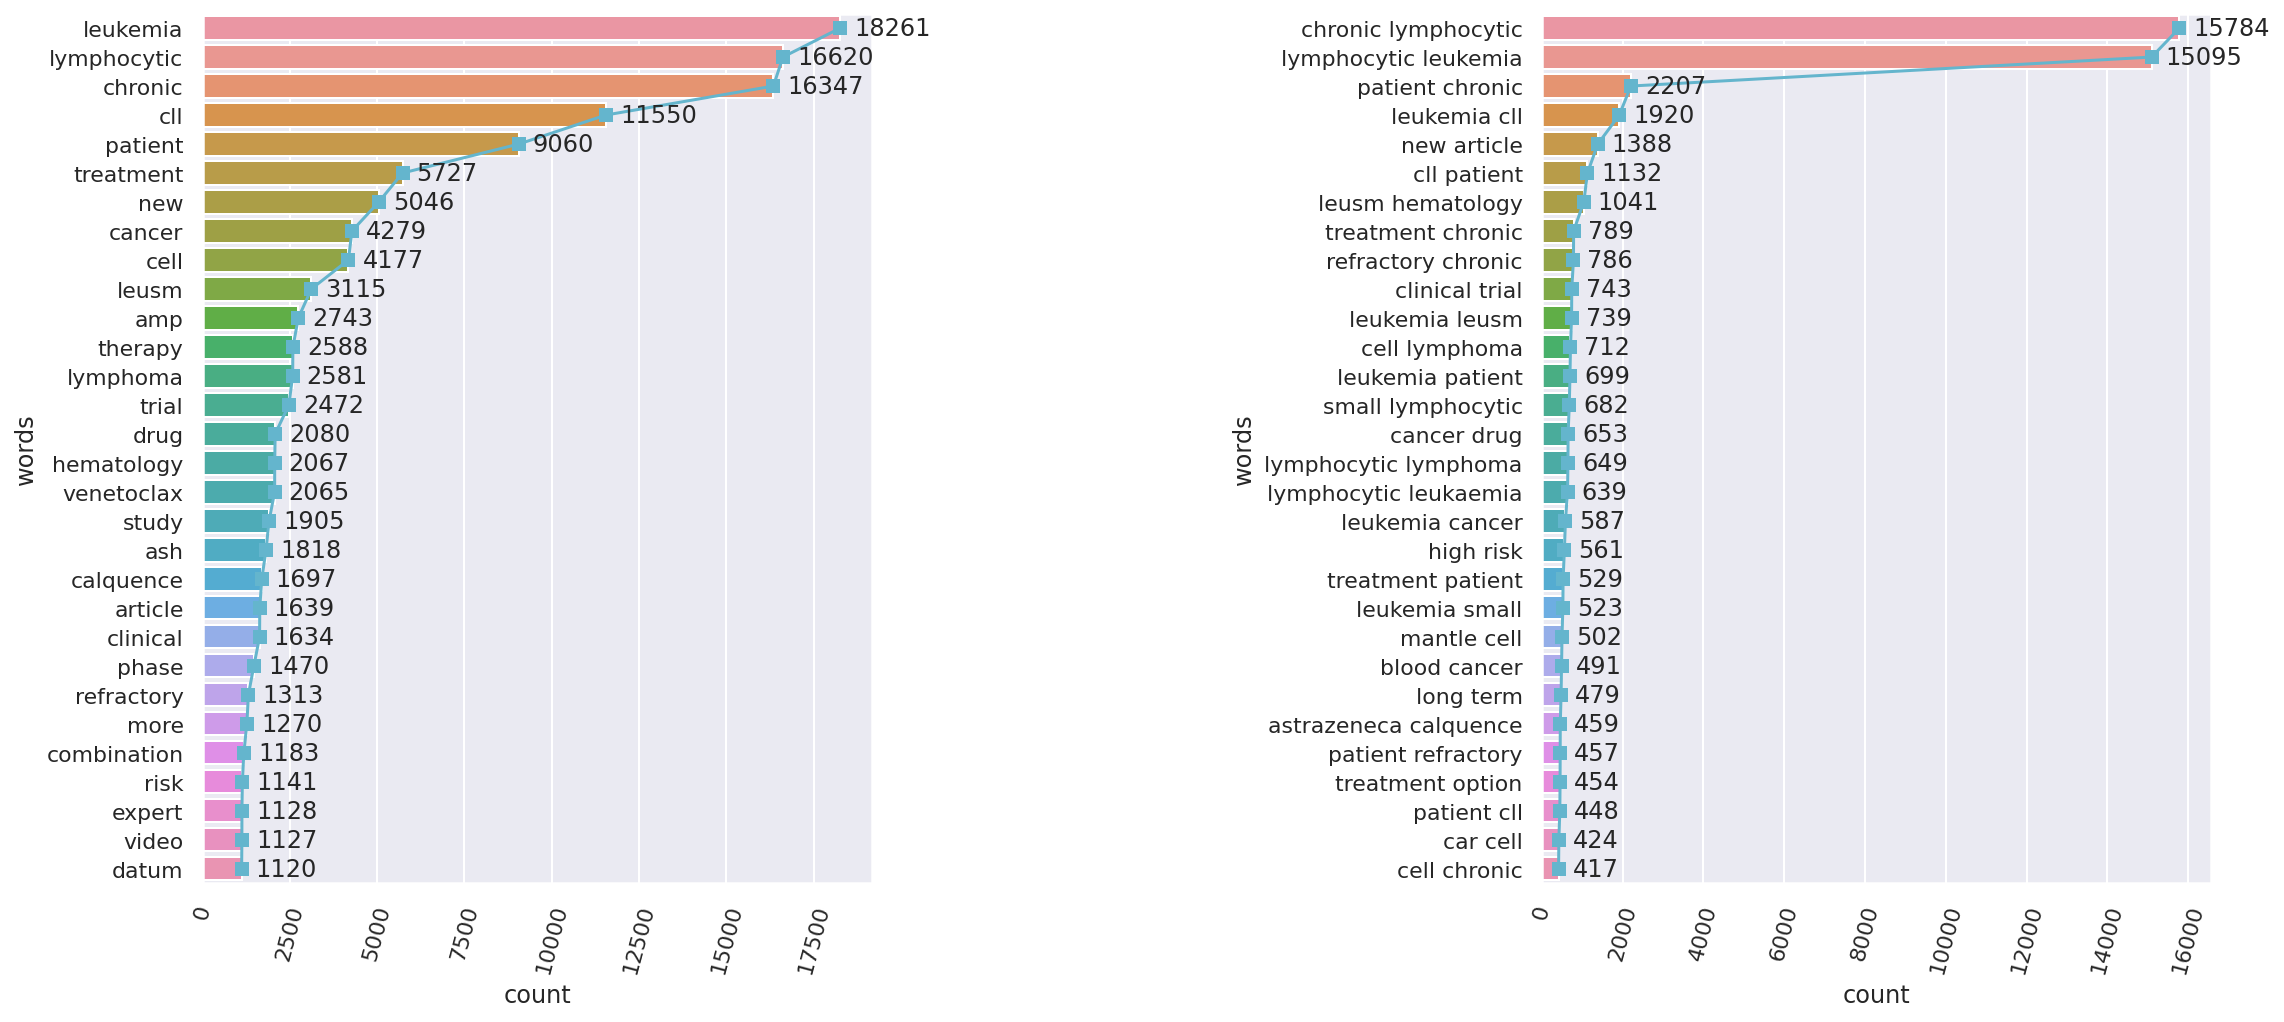

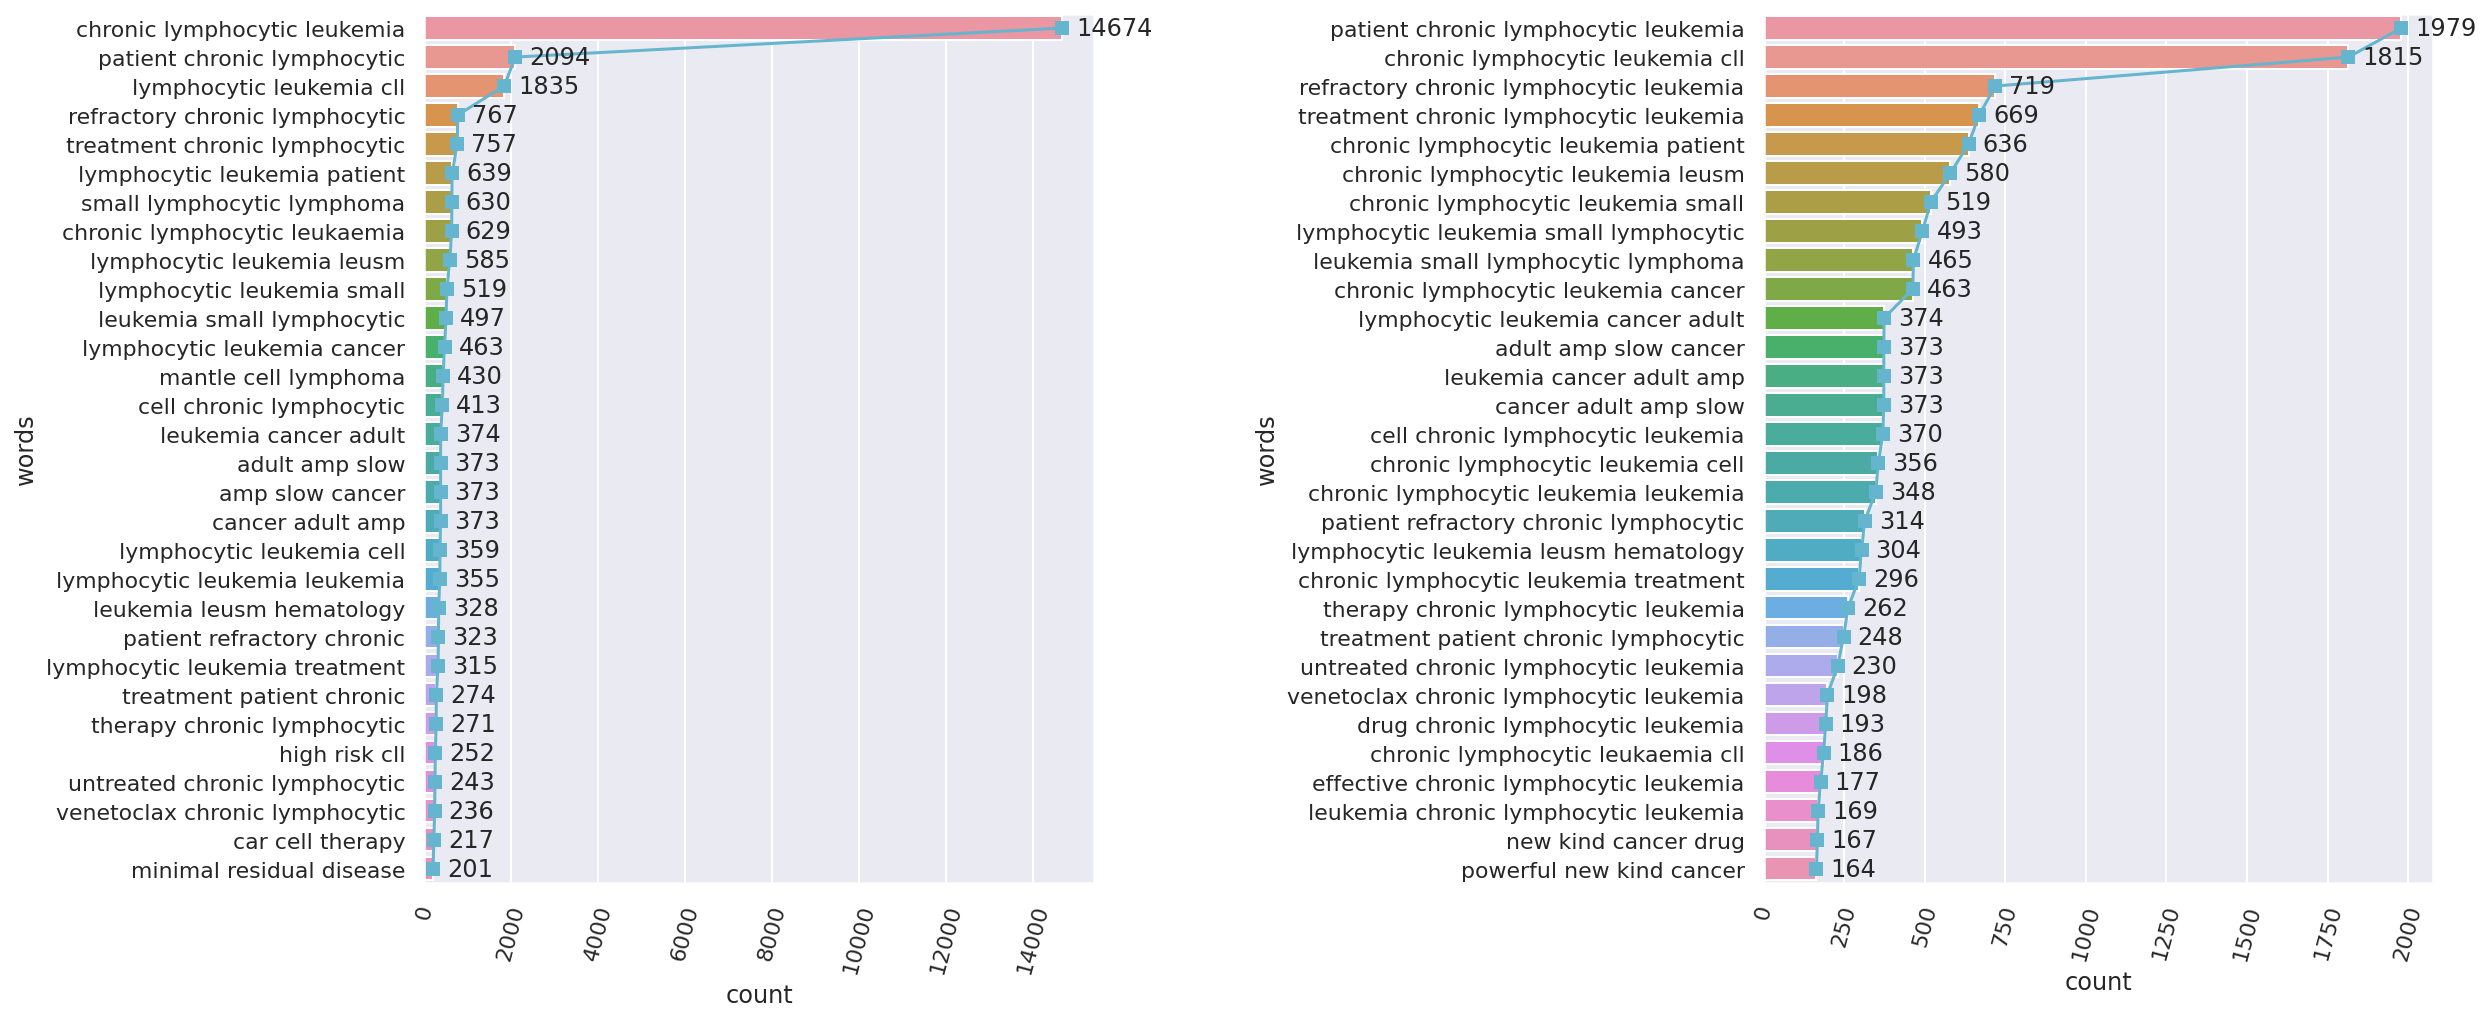

In [ ]:
sns.set(font_scale=1)
fig = plt.figure(figsize = (30,8))
plt.subplots_adjust(wspace=1)

ax = fig.add_subplot(131)
plt.plot(unigrams['count'],unigrams['words'], 's-c')
plt.xlabel('count')
plt.xticks(rotation=75)
ax = sns.barplot(unigrams['count'],unigrams['words'])
ax.bar_label(ax.containers[0], label_type = 'edge', padding = 7 );

ax1 = fig.add_subplot(132)
plt.plot(bigrams['count'],bigrams['words'], 's-c')
plt.xlabel('count')
plt.xticks(rotation=75)
ax1 = sns.barplot(bigrams['count'],bigrams['words'])
ax1.bar_label(ax1.containers[0], label_type = 'edge', padding = 7 );


fig = plt.figure(figsize = (30, 8))
plt.subplots_adjust(wspace=1)

ax2 = fig.add_subplot(131)
plt.plot(trigrams['count'],trigrams['words'], 's-c')
plt.xlabel('count')
plt.xticks(rotation=75)
ax2 = sns.barplot(trigrams['count'],trigrams['words'])
ax2.bar_label(ax2.containers[0], label_type = 'edge', padding = 7 );

ax3 = fig.add_subplot(132)
plt.plot(fr_grams['count'],fr_grams['words'], 's-c')
plt.xlabel('count')
plt.xticks(rotation=75)
ax3 = sns.barplot(fr_grams['count'],fr_grams['words'])
ax3.bar_label(ax3.containers[0], label_type = 'edge', padding = 7 );

In [ ]:
!pip uninstall matplotlib

## Topic Modelling

### Latent Dirichlet Allocation[LDA]


In natural language processing, Latent Dirichlet Allocation (LDA) is a generative statistical model that explains a set of observations through unobserved groups, and each group explains why some parts of the data are similar. The LDA is an example of a topic model. In this, observations (e.g., words) are collected into documents, and each word's presence is attributable to one of the document's topics. Each document will contain a small number of topics.

In [ ]:
import gensim
from gensim import corpora
from gensim.corpora import Dictionary

# create the term dictionary of corpus
dictionary = corpora.Dictionary(lemma_tweets)
# convert into document term matrix
doc_term_matrix = [dictionary.doc2bow(rev) for rev in lemma_tweets]
LDA = gensim.models.ldamodel.LdaModel
# Creating object for LDA model
lda_model= LDA(corpus=doc_term_matrix, id2word=dictionary,
               num_topics=20,
               random_state=100,
               chunksize=1000,
               passes=50)

In [ ]:
lda_model.print_topics()

[(0,
  '0.097*"therapy" + 0.081*"amp" + 0.068*"oncology" + 0.067*"key" + 0.055*"btki" + 0.043*"kind" + 0.041*"cll" + 0.025*"activity" + 0.022*"efficacy" + 0.022*"safety"'),
 (1,
  '0.094*"today" + 0.091*"effective" + 0.077*"leukaemia" + 0.061*"powerful" + 0.052*"therapeutic" + 0.049*"cll" + 0.046*"bloodcancer" + 0.036*"amp" + 0.021*"panel" + 0.021*"experience"'),
 (2,
  '0.118*"friend" + 0.105*"cll" + 0.090*"good" + 0.079*"rate" + 0.044*"response" + 0.032*"patient" + 0.024*"therapy" + 0.024*"care" + 0.021*"future" + 0.019*"talk"'),
 (3,
  '0.299*"cancer" + 0.081*"amp" + 0.054*"host" + 0.054*"blood" + 0.027*"story" + 0.025*"health" + 0.024*"use" + 0.020*"adult" + 0.019*"patient" + 0.018*"question"'),
 (4,
  '0.149*"video" + 0.048*"old" + 0.048*"genetic" + 0.042*"untreated" + 0.039*"current" + 0.038*"new" + 0.036*"area" + 0.032*"medicine" + 0.021*"part" + 0.020*"standard"'),
 (5,
  '0.111*"expert" + 0.066*"inhibitor" + 0.063*"cll" + 0.062*"great" + 0.055*"light" + 0.052*"green" + 0.030*"

In [ ]:
!pip install pyldavis

### Visualize LDA generated Topics

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensim
pyLDAvis.enable_notebook()
vis = gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.018863 -0.302822       1        1  20.191731
11    -0.019803 -0.088348       2        1   6.872833
17     0.143300 -0.146436       3        1   6.682554
10    -0.187323 -0.022103       4        1   5.598394
3     -0.116412  0.068099       5        1   5.330651
16     0.142349 -0.060163       6        1   4.489840
15    -0.202001 -0.122245       7        1   4.410876
19    -0.113885  0.008304       8        1   4.184943
13     0.031953 -0.026978       9        1   4.073124
0      0.037587  0.079506      10        1   4.054427
2      0.145001 -0.008720      11        1   3.806714
18     0.048494 -0.132808      12        1   3.801384
5      0.129255 -0.019314      13        1   3.618914
1      0.086602  0.139437      14        1   3.578080
14     0.150280  0.097811      15        1   3.508528
7      0.087325  0.121425      16        1   3.506180
4     -0.188434  0.008018      17        1   3.171151
12    -0.138479  0.193158      18        1   3.122067
6      0.117843  0.118557      19        1   3.044934
9     -0.134790  0.095623      20        1   2.952677, topic_info=             Term          Freq         Total Category  logprob  loglift
20       leukemia  16419.000000  16419.000000  Default  30.0000  30.0000
19        chronic  15420.000000  15420.000000  Default  29.0000  29.0000
21    lymphocytic  15345.000000  15345.000000  Default  28.0000  28.0000
60         cancer   4406.000000   4406.000000  Default  27.0000  27.0000
74           cell   4391.000000   4391.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
2825     announce     47.215736     48.424939  Topic20  -5.1509   3.4972
1296      sharman     44.481602     45.690805  Topic20  -5.2106   3.4956
498         count     44.123457     45.332660  Topic20  -5.2186   3.4954
2196       family     69.377663    118.364086  Topic20  -4.7661   2.9883
1         patient    139.664631   6023.480039  Topic20  -4.0664  -0.2417

[750 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1924      3  0.983098         abbv
206       1  0.244946       abbvie
206       2  0.750474       abbvie
2224      2  0.991752     aberrant
3380     12  0.996994  abnormality
...     ...       ...          ...
2358      3  0.989251     workshop
584       5  0.990650        world
161       9  0.217694         year
161      15  0.780744         year
1224     16  0.988405        young

[740 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 12, 18, 11, 4, 17, 16, 20, 14, 1, 3, 19, 6, 2, 15, 8, 5, 13, 7, 10])

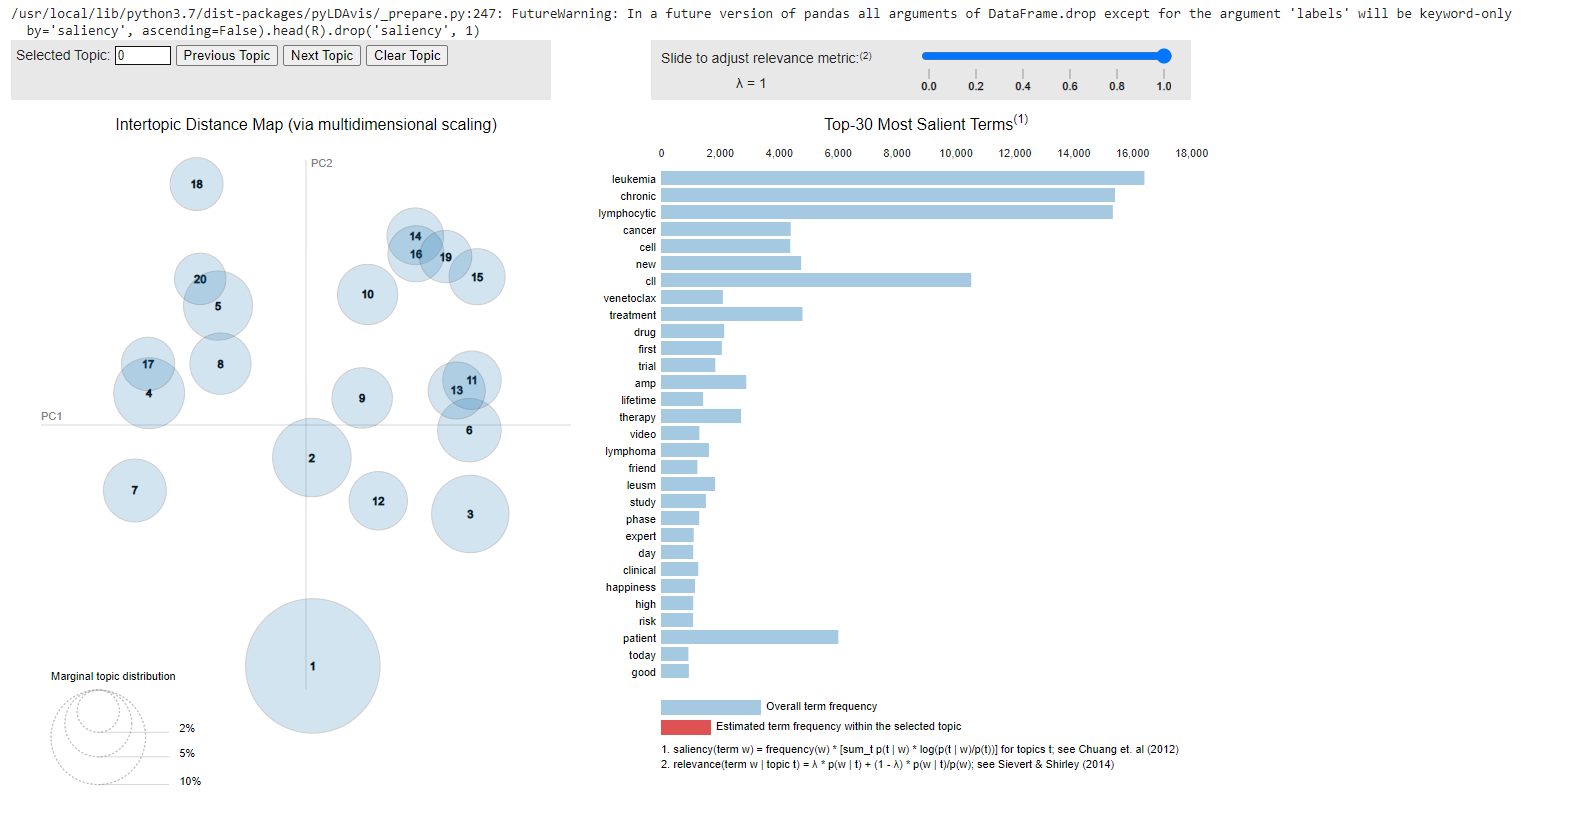

The intent of salience is to help identify which words are the most informative words for identifying topics in all the documents. Higher saliency values indicate that a word is more useful for identifying a specific topic.

In [ ]:
# Compute Coherence Score
from gensim.models import CoherenceModel
# Compute Perplexity
print('\nPerplexity : ', lda_model.log_perplexity(doc_term_matrix))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_tweets, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

In [ ]:
print('\nCoherence Score: ', coherence_lda);


Coherence Score:  0.3819192783646483


<pre>Perplexity :  -6.749451981202899</pre>

### Modelling based on BERTopic

In [ ]:
!pip install bertopic

In [ ]:
from bertopic import BERTopic
topic_model = BERTopic(calculate_probabilities=True)
topics, probabilties=topic_model.fit_transform(df_e['tweet_text'])

In [ ]:
topic_model.get_topic_info()

In [ ]:
cs = topic_model.get_topic_info()
cs.to_csv(folder_path+ 'topics_med.csv', index=False)

In [ ]:
topic_model.get_topic(0)

[('landing', 0.42778295834927593),
 ('hagd', 0.42778295834927593),
 ('gio', 0.42778295834927593),
 ('avgeek', 0.42778295834927593),
 ('promote', 0.3496677956170328),
 ('advertising', 0.2898554941465161),
 ('classic', 0.23681409941848733),
 ('serious', 0.18985184385140297),
 ('look', 0.17782325683173533),
 ('man', 0.13930212929998784)]

### Barchart of Sample Topics

In [ ]:
topic_model.visualize_barchart(top_n_topics=20)

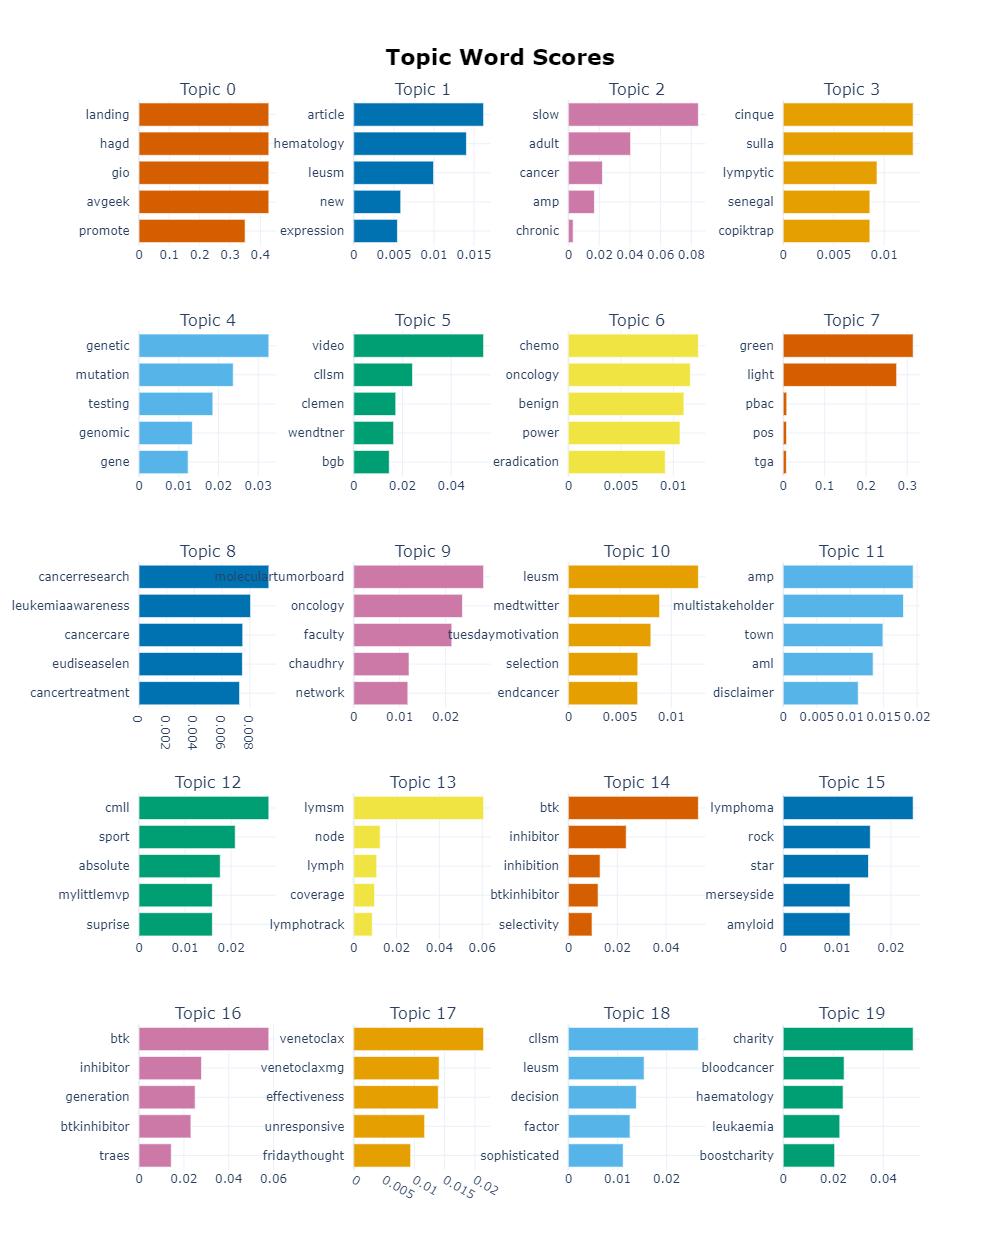

In [ ]:
fig = topic_model.visualize_barchart()
fig.write_html(folder_path + "file.html")

### Intertopic Distance Map

In [ ]:
topic_model.visualize_topics()

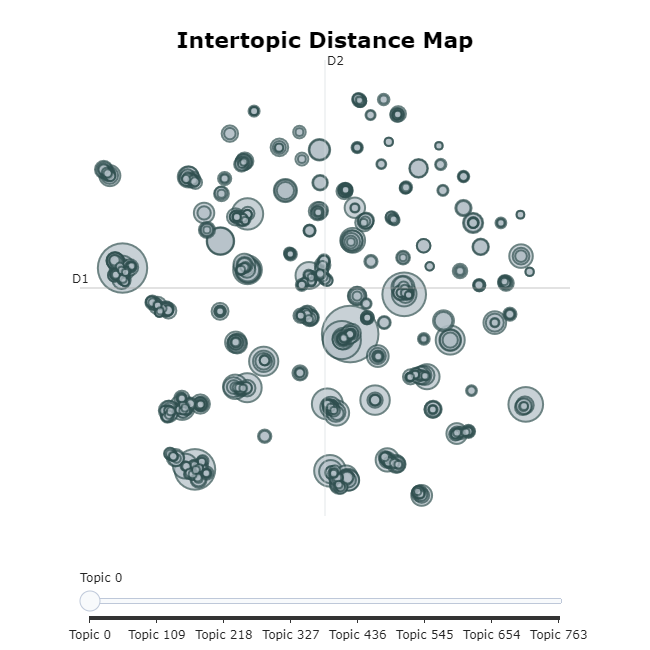

### Heatmap

In [ ]:
topic_model.visualize_heatmap()

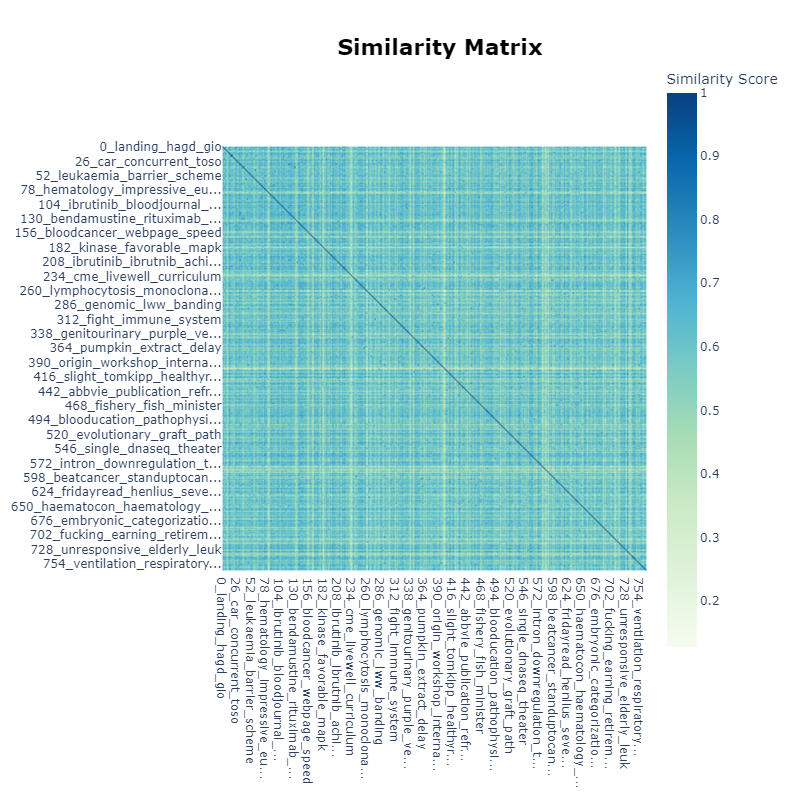

### Text based Topic tree

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(df_e['tweet_text'])
tree = topic_model.get_topic_tree(hierarchical_topics)
print(tree)

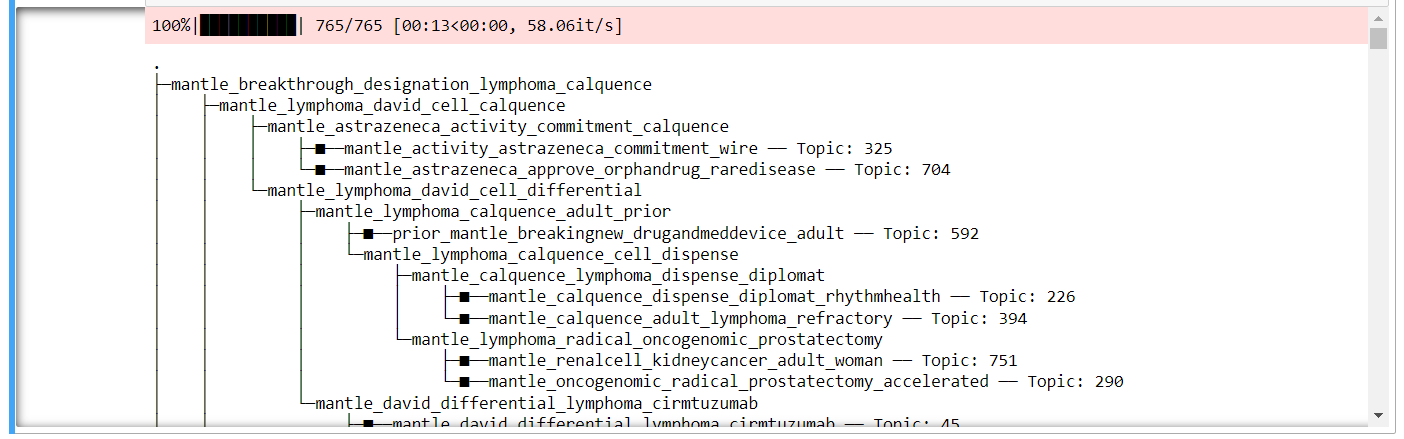

### Assign topics to respective tweets

In [ ]:
df_e['topics'] = topics
df_e.head()

tweet_author  \
1374140386071961602  Hematopoiesis News   
1374032432173842437    Michael Wang, MD   
1373902876553048065         1stOncology   
1373656782367813635           Toby Eyre   
1372941634334232586        Lymphoma Hub   

                                                                                      tweet_text  \
1374140386071961602                          scientist phase study patient overall response rate   
1374032432173842437  phase recruitment phase study venetoclax patient respondent initial therapy   
1373902876553048065                                                      nice back calquence cll   
1373656782367813635            valuable option intolerant valuable datum decision cll early view   
1372941634334232586          nice recommended use patient treatment chronic lymphocytic leukemia   

                    language                               hashtag  topics  
1374140386071961602       en                                 [cll]      -1  
1374032432173842437       en                                    []     634  
1373902876553048065       en  [nice, astrazenecas, calquence, cll]     669  
1373656782367813635       en       [acalabrutinib, ibrutinib, cll]      -1  
1372941634334232586       en                     [lymsm, lymphoma]     591

In [ ]:
the_topics = topic_model.get_topics()

In [ ]:
df_exp=pd.DataFrame.from_dict(the_topics)

### Dataframe of Topics

In [ ]:
df_exp.head()

-1                               0    \
0         (cll, 0.001431395387165383)  (landing, 0.42778295834927593)   
1      (thank, 0.0014300998856078234)     (hagd, 0.42778295834927593)   
2      (great, 0.0014223260000549014)      (gio, 0.42778295834927593)   
3       (good, 0.0014180679666488236)   (avgeek, 0.42778295834927593)   
4  (community, 0.0013696578185530559)   (promote, 0.3496677956170328)   

                                  1                                 2    \
0      (article, 0.01619751558370362)       (slow, 0.08459315497352908)   
1  (hematology, 0.014055986076981277)     (adult, 0.040419789003402644)   
2        (leusm, 0.00995925406648703)    (cancer, 0.022091542515451867)   
3         (new, 0.005860870392110731)       (amp, 0.016868357498414026)   
4  (expression, 0.005447574045626547)  (chronic, 0.0030049160476373496)   

                                 3                                 4    \
0     (cinque, 0.012871207200626974)    (genetic, 0.03267986710023819)   
1      (sulla, 0.012871207200626974)  (mutation, 0.023719014196051876)   
2   (lympytic, 0.009287147005342746)   (testing, 0.018585119137020285)   
3    (senegal, 0.008580804800417983)     (genomic, 0.0134303183801362)   
4  (copiktrap, 0.008580804800417983)      (gene, 0.012363919121311875)   

                                5                                    6    \
0     (video, 0.053313253026408165)         (chemo, 0.01239000334747116)   
1     (cllsm, 0.024131507315849118)     (oncology, 0.011621735824095758)   
2     (clemen, 0.01724700727649944)       (benign, 0.011008198146155597)   
3  (wendtner, 0.016361175942282494)        (power, 0.010637442743425977)   
4       (bgb, 0.014578410551830732)  (eradication, 0.009227625057543631)   

                            7                                         8    \
0   (green, 0.3142370357603154)    (cancerresearch, 0.009370244004130805)   
1    (light, 0.274288963798748)  (leukemiaawareness, 0.00805265198895713)   
2  (pbac, 0.008325423705167447)        (cancercare, 0.007487114968787723)   
3   (pos, 0.007840404298467909)      (eudiseaselen, 0.007462418826123995)   
4    (tga, 0.00746513375767446)   (cancertreatment, 0.007260172277251687)   

                                           9    \
0  (moleculartumorboard, 0.028283562107989445)   
1              (oncology, 0.02368349550840254)   
2                 (faculty, 0.021359132851095)   
3             (chaudhry, 0.012039052646519813)   
4              (network, 0.011781906398042646)   

                                         10   \
0              (leusm, 0.012642315147615317)   
1         (medtwitter, 0.008867980037155367)   
2  (tuesdaymotivation, 0.008018391254729704)   
3          (selection, 0.006745073438945894)   
4          (endcancer, 0.006732458168196295)   

                                       11   \
0               (amp, 0.01941615284251722)   
1  (multistakeholder, 0.01797213555112996)   
2             (town, 0.014895225245145048)   
3               (aml, 0.01343076099587455)   
4       (disclaimer, 0.011202171941964437)   

                                   12                                   13   \
0          (cmll, 0.02818253918376615)        (lymsm, 0.060644300765167865)   
1        (sport, 0.020887827754903707)         (node, 0.012340423547897349)   
2     (absolute, 0.017635092509887353)        (lymph, 0.010737911716938955)   
3  (mylittlemvp, 0.015928088874707085)     (coverage, 0.009728041106666516)   
4      (suprise, 0.015928088874707085)  (lymphotrack, 0.008664460125180762)   

                                    14                                 15   \
0            (btk, 0.05326388857143306)   (lymphoma, 0.024146809895081434)   
1     (inhibitor, 0.023665278393227834)       (rock, 0.016176317831544253)   
2    (inhibition, 0.012960741865161827)       (star, 0.015840590256366593)   
3  (btkinhibitor, 0.012126882255963601)  (merseyside, 0.01240823739238416)   
4   (selectivity, 0.009636592927415697)     (a

In [ ]:
df_exp.to_csv(folder_path+ 'topic_scores.csv', index=False)

In [ ]:
np.save(folder_path + 'prob',probabilties)

In [ ]:
the_topics[100]

[('abnormality', 0.14286730187882052),
 ('chromosomal', 0.14129308796158752),
 ('specific', 0.11240791463793608),
 ('drug', 0.019029855370732318),
 ('newdrug', 0.010287994886501041),
 ('new', 0.008106225624221204),
 ('pharma', 0.00542065420817568),
 ('patient', 0.00475267033399552),
 ('regulatory', 0.0027673976259603183),
 ('chronic', 0.0026624325877563524)]

In [ ]:
df_e.to_csv(folder_path + 'withtopics.csv', index=False)

In [ ]:
# Topic discussed by specific authors
ts = pd.read_csv(folder_path+'topic_scores.csv')

In [ ]:
ts.head()

-1                                 0  \
0         ('cll', 0.001431395387165383)  ('landing', 0.42778295834927593)   
1      ('thank', 0.0014300998856078234)     ('hagd', 0.42778295834927593)   
2      ('great', 0.0014223260000549014)      ('gio', 0.42778295834927593)   
3       ('good', 0.0014180679666488236)   ('avgeek', 0.42778295834927593)   
4  ('community', 0.0013696578185530559)   ('promote', 0.3496677956170328)   

                                      1                                   2  \
0      ('article', 0.01619751558370362)       ('slow', 0.08459315497352908)   
1  ('hematology', 0.014055986076981277)     ('adult', 0.040419789003402644)   
2        ('leusm', 0.00995925406648703)    ('cancer', 0.022091542515451867)   
3         ('new', 0.005860870392110731)       ('amp', 0.016868357498414026)   
4  ('expression', 0.005447574045626547)  ('chronic', 0.0030049160476373496)   

                                     3                                   4  \
0     ('cinque', 0.012871207200626974)    ('genetic', 0.03267986710023819)   
1      ('sulla', 0.012871207200626974)  ('mutation', 0.023719014196051876)   
2   ('lympytic', 0.009287147005342746)   ('testing', 0.018585119137020285)   
3    ('senegal', 0.008580804800417983)     ('genomic', 0.0134303183801362)   
4  ('copiktrap', 0.008580804800417983)      ('gene', 0.012363919121311875)   

                                    5                                      6  \
0     ('video', 0.053313253026408165)         ('chemo', 0.01239000334747116)   
1     ('cllsm', 0.024131507315849118)     ('oncology', 0.011621735824095758)   
2     ('clemen', 0.01724700727649944)       ('benign', 0.011008198146155597)   
3  ('wendtner', 0.016361175942282494)        ('power', 0.010637442743425977)   
4       ('bgb', 0.014578410551830732)  ('eradication', 0.009227625057543631)   

                                7                                           8  \
0   ('green', 0.3142370357603154)    ('cancerresearch', 0.009370244004130805)   
1    ('light', 0.274288963798748)  ('leukemiaawareness', 0.00805265198895713)   
2  ('pbac', 0.008325423705167447)        ('cancercare', 0.007487114968787723)   
3   ('pos', 0.007840404298467909)      ('eudiseaselen', 0.007462418826123995)   
4    ('tga', 0.00746513375767446)   ('cancertreatment', 0.007260172277251687)   

                                               9  \
0  ('moleculartumorboard', 0.028283562107989445)   
1              ('oncology', 0.02368349550840254)   
2                 ('faculty', 0.021359132851095)   
3             ('chaudhry', 0.012039052646519813)   
4              ('network', 0.011781906398042646)   

                                            10  \
0              ('leusm', 0.012642315147615317)   
1         ('medtwitter', 0.008867980037155367)   
2  ('tuesdaymotivation', 0.008018391254729704)   
3          ('selection', 0.006745073438945894)   
4          ('endcancer', 0.006732458168196295)   

                                          11  \
0               ('amp', 0.01941615284251722)   
1  ('multistakeholder', 0.01797213555112996)   
2             ('town', 0.014895225245145048)   
3               ('aml', 0.01343076099587455)   
4       ('disclaimer', 0.011202171941964437)   

                                      12  \
0          ('cmll', 0.02818253918376615)   
1        ('sport', 0.020887827754903707)   
2     ('absolute', 0.017635092509887353)   
3  ('mylittlemvp', 0.015928088874707085)   
4      ('suprise', 0.015928088874707085)   

                                      13  \
0        ('lymsm', 0.060644300765167865)   
1         ('node', 0.012340423547897349)   
2        ('lymph', 0.010737911716938955)   
3     ('coverage', 0.009728041106666516)   
4  ('lymphotrack', 0.008664460125180762)   

                                       14  \
0            ('btk', 0.05326388857143306)   
1     ('inhibitor', 0.023665278393227834)   
2    ('inhibition', 0.012960741865161827)   
3  ('btkinhibitor', 0.012126882255963601)   
4   

In [ ]:
ts['19']

0           ('charity', 0.05193189182708377)
1        ('bloodcancer', 0.0243272634048387)
2      ('haematology', 0.023914152463753866)
3        ('leukaemia', 0.022587644107598323)
4     ('boostcharity', 0.020532255206241357)
5      ('fundraising', 0.018019808194142468)
6    ('charitytuesday', 0.01796262876478108)
7        ('membership', 0.01677003158814873)
8           ('support', 0.01602144264550738)
9           ('member', 0.015989099743596333)
Name: 19, dtype: object

In [ ]:
# explore chronic lympho
trigrams = pd.read_csv(folder_path+ 'entities/entity_trigrams.csv')
fr_grams = pd.read_csv(folder_path+ 'entities/entity_fr_grams.csv')
fv_grams = pd.read_csv(folder_path+ 'entities/entity_fv_grams.csv')
sx_grams = pd.read_csv(folder_path+ 'entities/entity_sx_grams.csv')

# trigrams

In [ ]:
df_e = pd.read_csv(folder_path+ 'withtopics.csv')

In [ ]:
# explore chronic lymphocytic leukemia
df_e.head()

tweet_author  \
0  Hematopoiesis News   
1    Michael Wang, MD   
2         1stOncology   
3           Toby Eyre   
4        Lymphoma Hub   

                                                                    tweet_text  \
0                          scientist phase study patient overall response rate   
1  phase recruitment phase study venetoclax patient respondent initial therapy   
2                                                      nice back calquence cll   
3            valuable option intolerant valuable datum decision cll early view   
4          nice recommended use patient treatment chronic lymphocytic leukemia   

  language                                       hashtag  topics  
0       en                                       ['cll']      -1  
1       en                                            []     634  
2       en  ['nice', 'astrazenecas', 'calquence', 'cll']     669  
3       en         ['acalabrutinib', 'ibrutinib', 'cll']      -1  
4       en                         ['lymsm', 'lymphoma']     591

## View selected entites and tweets of selected tweet-authors on the entity

In [ ]:
authors = df_e['tweet_author']

In [ ]:
selected_authors = authors[:10]

In [ ]:
selected_fr = fr_grams.iloc[[1,6, 16, 20,25,26,]]

In [ ]:
selected_fr

words  count
1                      new kind cancer drug    167
6   venetoclax chronic lymphocytic leukemia    198
16                    adult amp slow cancer    373
20      chronic lymphocytic leukemia cancer    463
25     chronic lymphocytic leukemia patient    636
26   treatment chronic lymphocytic leukemia    669

In [ ]:
selected_tri = trigrams.iloc[[0,1,9,17]]
selected_tri

words  count
0    minimal residual disease    201
1            car cell therapy    217
9   leukemia leusm hematology    328
17       mantle cell lymphoma    430

In [ ]:
selected_entities = selected_tri.append(selected_fr, ignore_index=True)

In [ ]:
selected_entities

words  count
0                 minimal residual disease    201
1                         car cell therapy    217
2                leukemia leusm hematology    328
3                     mantle cell lymphoma    430
4                     new kind cancer drug    167
5  venetoclax chronic lymphocytic leukemia    198
6                    adult amp slow cancer    373
7      chronic lymphocytic leukemia cancer    463
8     chronic lymphocytic leukemia patient    636
9   treatment chronic lymphocytic leukemia    669

In [ ]:
new_dict = []
def entity_frame(regex,authors):
  for k in regex:
    reg_df = df_e.loc[df_e.tweet_text.str.contains(str(k), na=False)][['tweet_author','tweet_text', 'topics']]
    for i in authors:
      tup = reg_df[reg_df.tweet_author==str(i)][['tweet_text']]
      if(len(tup)!=0):
          val = tup.to_numpy()[0][0]
          new_dict.append({
          'entity': k,
          'author_name':i,
          'tweets': val
            })
  n_df = pd.DataFrame.from_dict(new_dict)
  return n_df

n_df = entity_frame(selected_entities['words'], selected_authors)

In [ ]:
n_df

entity         author_name  \
0                  minimal residual disease           Toby Eyre   
1                  minimal residual disease        Lymphoma Hub   
2                  minimal residual disease         CLL Ireland   
3                          car cell therapy        Lymphoma Hub   
4                          car cell therapy         CLL Ireland   
5                      mantle cell lymphoma  Hematopoiesis News   
6                      mantle cell lymphoma    Michael Wang, MD   
7                      mantle cell lymphoma           Toby Eyre   
8                      mantle cell lymphoma        David Ledger   
9   venetoclax chronic lymphocytic leukemia  Hematopoiesis News   
10  venetoclax chronic lymphocytic leukemia           Toby Eyre   
11  venetoclax chronic lymphocytic leukemia        Lymphoma Hub   
12     chronic lymphocytic leukemia patient  Hematopoiesis News   
13     chronic lymphocytic leukemia patient           Toby Eyre   
14   treatment chronic lymphocytic leukemia  Hematopoiesis News   
15   treatment chronic lymphocytic leukemia         1stOncology   
16   treatment chronic lymphocytic leukemia           Toby Eyre   
17   treatment chronic lymphocytic leukemia        Lymphoma Hub   

                                                                                                                                                                    tweets  
0                                                                            interesting target cll reliable marker minimal residual disease chronic lymphocytic leukaemia  
1                                                                                                undetectable minimal residual disease prognosis cll summary cll trial ash  
2   chemotherapy free option treatment duration cld prolonged progression free survival minimal residual disease negativity mrd patient high proportion patient venetoclax  
3                                                car cell therapy lot interest lymphoma community head summary phase trial safety efficacy car cell positive nhl cll lymsm  
4                                                                   health potential chimeric receptor car cell therapy treatment patient chronic lymphocytic leukemia cll  
5                                                                                                                             calquence adult patient mantle cell lymphoma  
6                                      study treatment mantle cell lymphoma patient high rate durable response overall response complete response favorable safety profile  
7                                                                                                                       outcome mantle cell lymphoma patient acalabrutinib  
8                                                                                                                 astrazeneca calquence adult patient mantle cell lymphoma  
9                                                                                            european regulator application abbvie venetoclax chronic lymphocytic leukemia  
10                                              bulk disruption notch mutation refractoriness venetoclax venetoclax chronic lymphocytic leukemia disease response variable  
11                                                                                                                             venetoclax chronic lymphocytic leukemia cll  
12                                                          review scientist epigenetic dys regulation cell chronic lymphocytic leukemia patient knowledge neoplastic cell  
13                                                                                 such important symptom conceptual model chronic lymphocytic leukemia patient experience  
14                                                                                                                     lenalidomide treatment chronic lymphocytic leukem

* Thus based on the entities and authors I have extracted tweets.
* It can be useful based on the requirement of the problem in hand.
* It can also be used to learn the sentiment of the author tweets, with respect to the entities.

### References
* https://www.kaggle.com/code/rtatman/analyzing-multilingual-data/notebook
* https://www.kaggle.com/code/longtng/nlp-preprocessing-feature-extraction-methods-a-z